In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns

diamonds = sns.load_dataset('diamonds')
df = diamonds
# Display the first few rows
print("First 5 rows of the dataset:")
print(diamonds.head())

# Get dataset information
print("\nDataset information:")
print(diamonds.info())

# Summary statistics of numerical features
print("\nSummary statistics:")
print(diamonds.describe())

# Unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in diamonds.select_dtypes(include='object').columns:
    print(f"Column: {col}")
    print(diamonds[col].unique())

First 5 rows of the dataset:
   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-

In [3]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [4]:
df.describe().columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')

In [5]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [7]:
# look at numeric and categorical values separately 
df_num = df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']]
df_cat = df[['cut','color','clarity']]

## Variation

### Discrete variables

<Axes: xlabel='cut', ylabel='Count'>

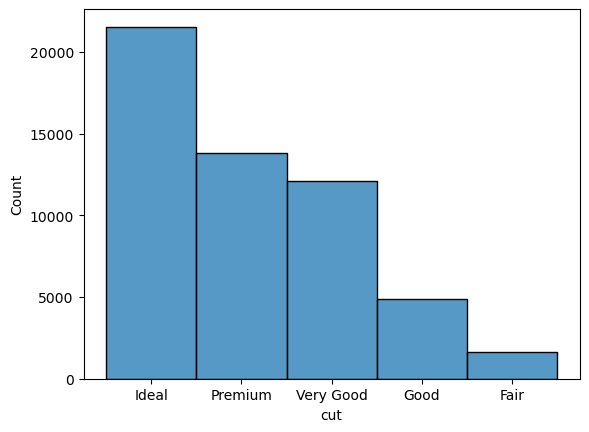

In [59]:
sns.histplot(data=diamonds, x='cut')

### Continuous variables

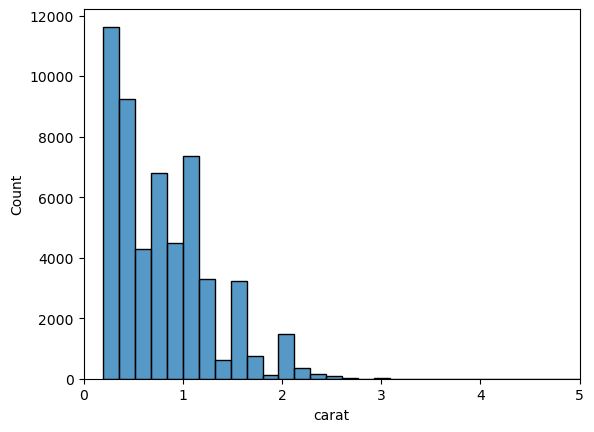

In [69]:
sns.histplot(data=diamonds, x='carat', bins = 30)

# Set the x-axis limits
plt.xlim(0, 5)

# Display the plot
plt.show()

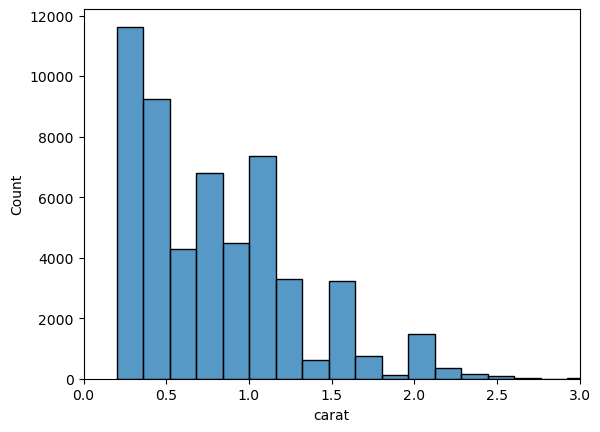

In [71]:
sns.histplot(data=diamonds, x='carat', bins = 30)

# Set the x-axis limits
plt.xlim(0, 3)

# Display the plot
plt.show()

### Bins Modification within x at [0,3]

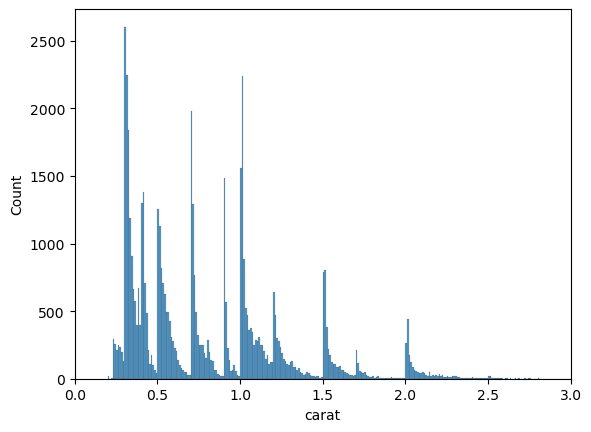

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

diamonds = sns.load_dataset('diamonds')

# Create the histogram using seaborn
sns.histplot(data=diamonds, x='carat', binwidth=0.01)

# Set the x-axis limits
plt.xlim(0, 3)

# Display the plot
plt.show()

## Covariation

### Discrete vs Discrete

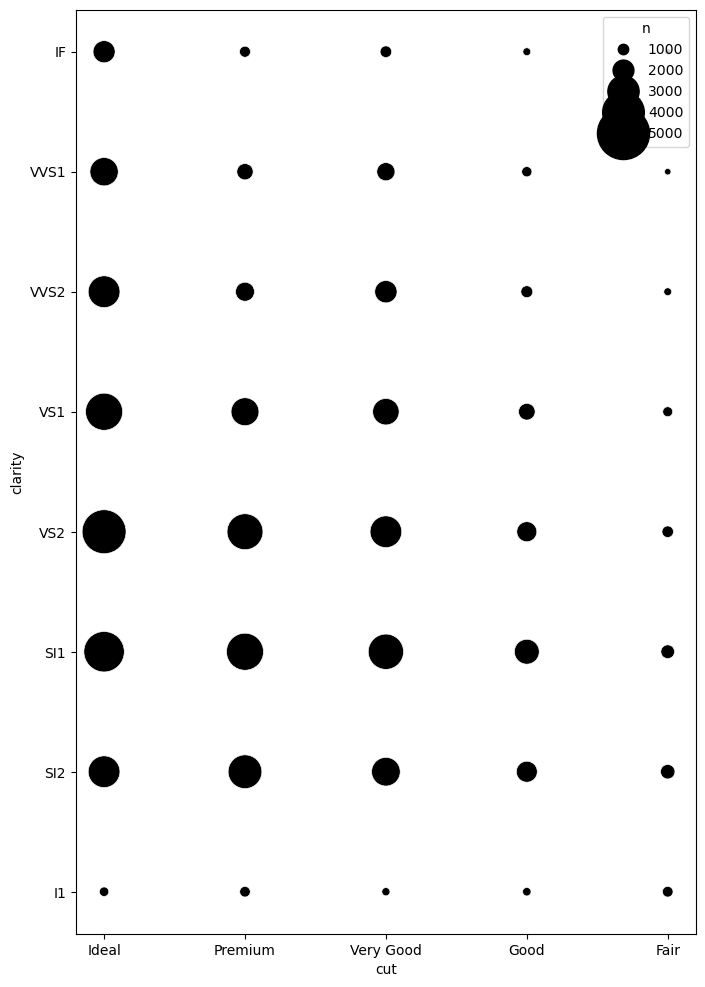

In [55]:
df = pd.DataFrame(diamonds)

# Calculate the counts for each combination of cut and clarity
df_counts = df.groupby(['cut', 'clarity'], observed=True).size().reset_index(name='count')

# Create the scatterplot using matplotlib
plt.figure(figsize=(8,12))
sns.scatterplot(data=df_counts, x="cut", y="clarity", size="count", sizes=(20,1000), color="black", legend=False)

# Add a legend for the circle sizes, based on a sample.
sizes_to_show = [1000, 2000, 3000, 4000, 5000]
legend_elements=[]

for size in sizes_to_show:
  #we assume the circle size is proportional to sqrt(count) for the legend, and scale down the value for better representation in the plot
  legend_elements.append(plt.Line2D([0],[0],marker='o',color='black', linestyle="", markersize=0.0075*size, label = str(size)))

plt.legend(handles = legend_elements, title = 'n')
plt.show()

### Continuous vs Continuous

<Axes: xlabel='x', ylabel='y'>

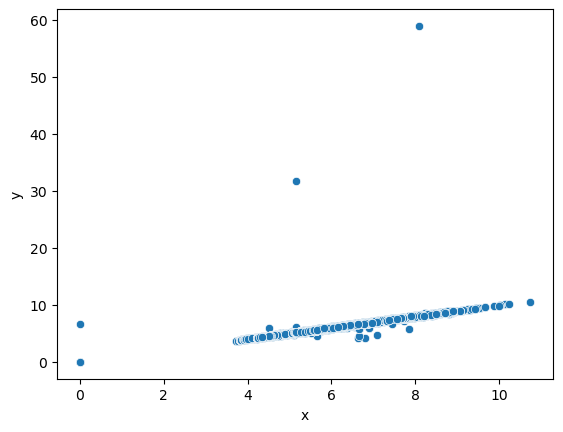

In [82]:
sns.scatterplot(data=diamonds, x="x", y="y")

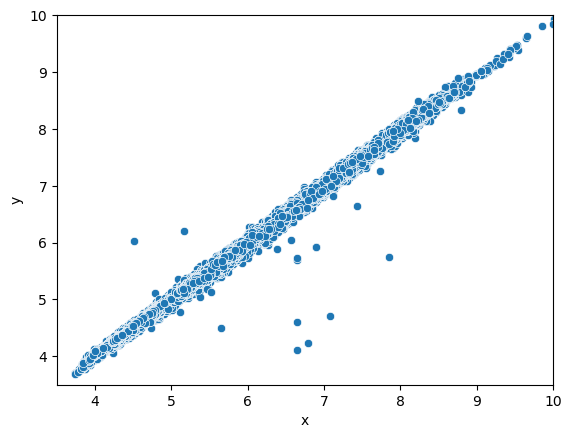

In [86]:
ax = sns.scatterplot(data=diamonds, x="x", y="y")

# Set the x and y limits to zoom in
ax.set_xlim(3.5, 10)
ax.set_ylim(3.5, 10)

# Add labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

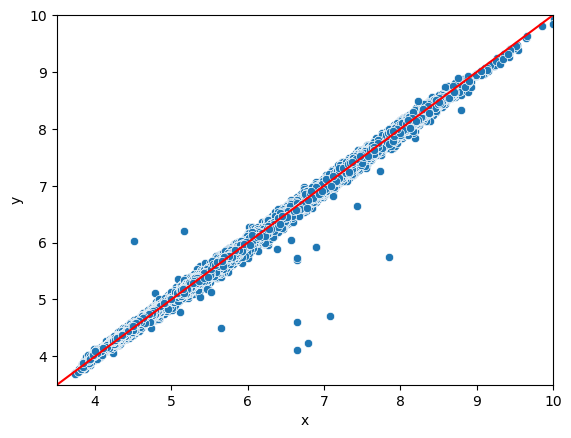

In [88]:

ax = sns.scatterplot(data=diamonds, x="x", y="y")

# Create the line
x_vals = np.array([3.5, 10])  # Generate x-values for our line
y_vals = x_vals # Since y = x, y values should be the same

ax.plot(x_vals, y_vals, color='red') # adds the line to the axis

# Set the x and y limits to zoom in
ax.set_xlim(3.5, 10)
ax.set_ylim(3.5, 10)

# Add labels
ax.set_xlabel('x')
ax.set_ylabel('y')

# Show the plot
plt.show()

#### One to One

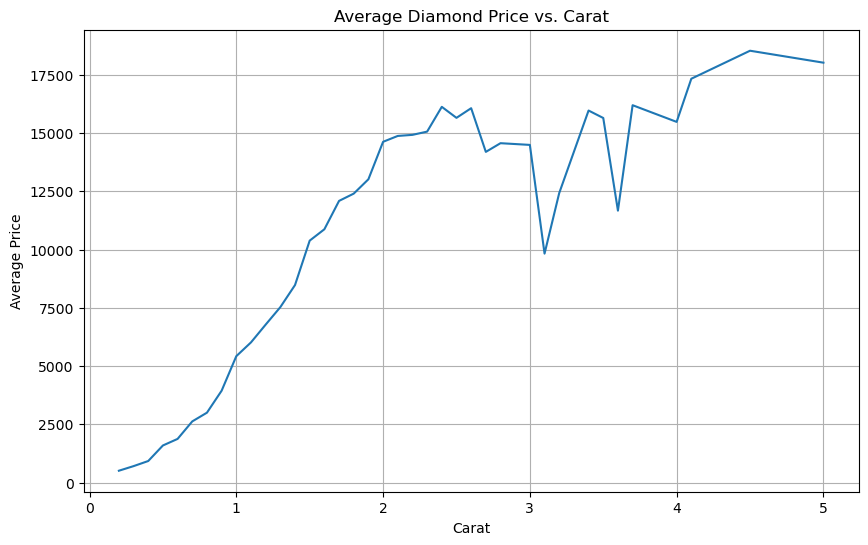

In [91]:
# Round the 'carat' column to 1 decimal place
diamonds['carat'] = diamonds['carat'].round(1)

# Group by the rounded 'carat' and calculate the mean 'price'
avg_price_by_carat = diamonds.groupby('carat')['price'].mean().reset_index(name='avg_price')

# Create the line plot
plt.figure(figsize=(10, 6))  # Optional: Set figure size for better visualization
sns.lineplot(data=avg_price_by_carat, x='carat', y='avg_price')
plt.xlabel('Carat')  # Set x-axis label
plt.ylabel('Average Price')  # Set y-axis label
plt.title('Average Diamond Price vs. Carat')  # Set plot title
plt.grid(True)  # Add grid lines
plt.show() # display graph

### Continuous vs Discrete

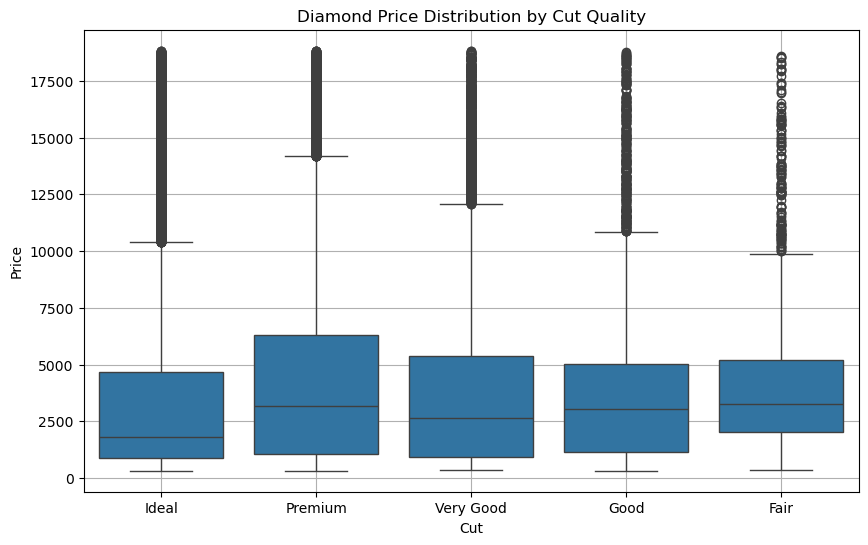

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Create the boxplot
plt.figure(figsize=(10, 6))  # Optional: Set figure size
sns.boxplot(data=diamonds, x="cut", y="price")

# Set labels and title
plt.xlabel("Cut")
plt.ylabel("Price")
plt.title("Diamond Price Distribution by Cut Quality")

plt.grid(True) # Add grid
plt.show()  # Display the plot

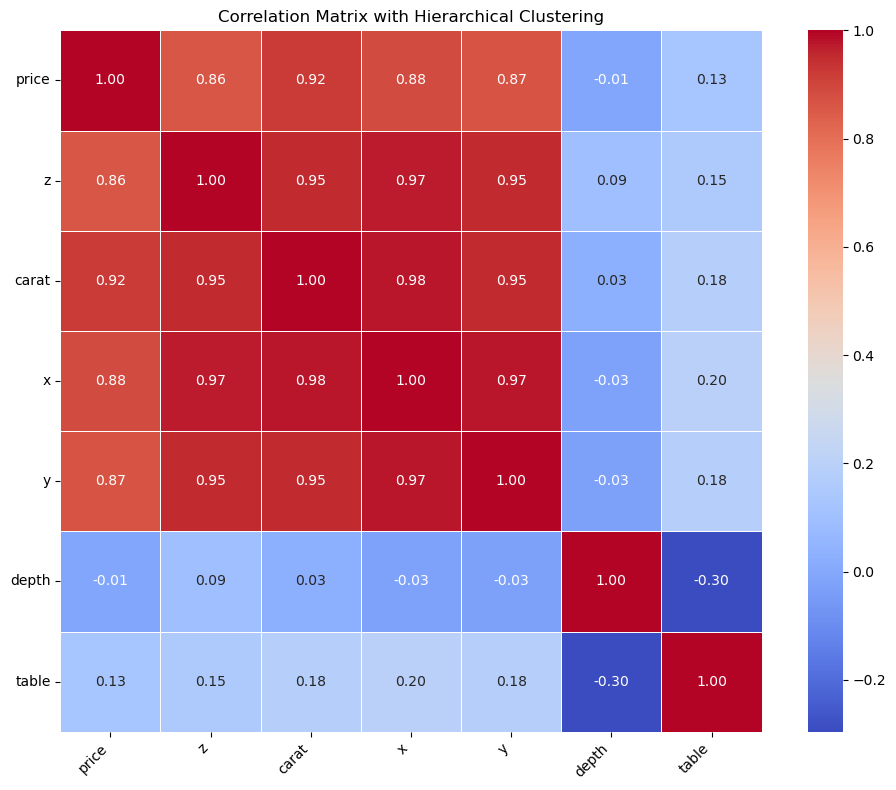

In [100]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, leaves_list

def corrplot_with_order(df, figsize=(10, 8)):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Perform hierarchical clustering
    row_linkage = linkage(corr_matrix, method='average')
    col_linkage = linkage(corr_matrix.T, method='average')
    
    row_order = leaves_list(row_linkage)
    col_order = leaves_list(col_linkage)

    ordered_corr = corr_matrix.iloc[row_order, col_order]

    # Create the heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(ordered_corr, annot=True, cmap='coolwarm',
                fmt=".2f", linewidths=.5, square=True)  # Add annotations
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.title("Correlation Matrix with Hierarchical Clustering")
    plt.tight_layout() # Ensure everything fits well
    plt.show()

# Load the diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Select numeric columns for correlation calculation
numeric_cols = diamonds.select_dtypes(include=np.number).columns

corr_df = diamonds[numeric_cols].copy()

# Call the custom function for plotting
corrplot_with_order(corr_df)

## Additional Visualization Tools 

### Axis Transformations

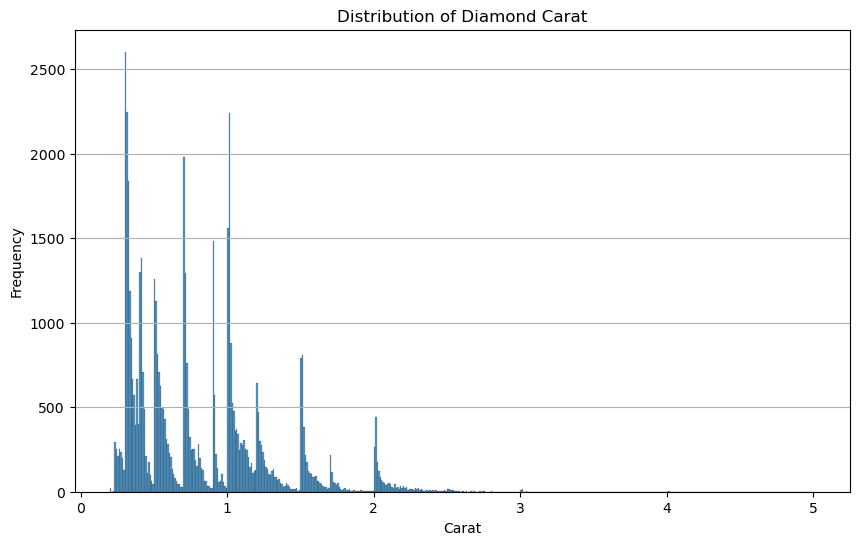

In [102]:
plt.figure(figsize=(10, 6))  # Optional: Set figure size
sns.histplot(data=diamonds, x="carat", binwidth=0.01)

# Set labels and title
plt.xlabel("Carat")
plt.ylabel("Frequency")
plt.title("Distribution of Diamond Carat")
plt.grid(axis = 'y') # add y grid only
plt.show()  # Display the plot

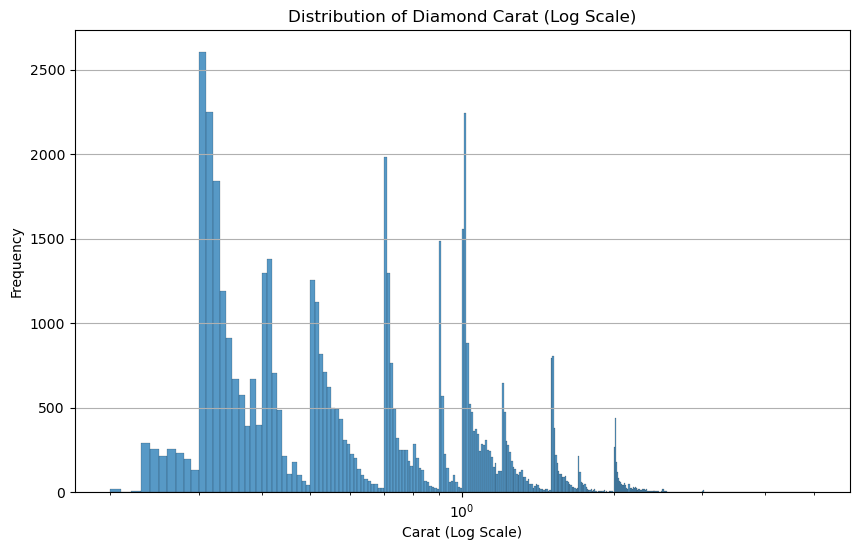

In [108]:
# Create the histogram with log10 scale on the x axis
plt.figure(figsize=(10, 6))
sns.histplot(data=diamonds, x="carat", binwidth=0.01)

#set scale
plt.xscale('log')

# Set labels and title
plt.xlabel("Carat (Log Scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Diamond Carat (Log Scale)")
plt.grid(axis = 'y')
plt.show()

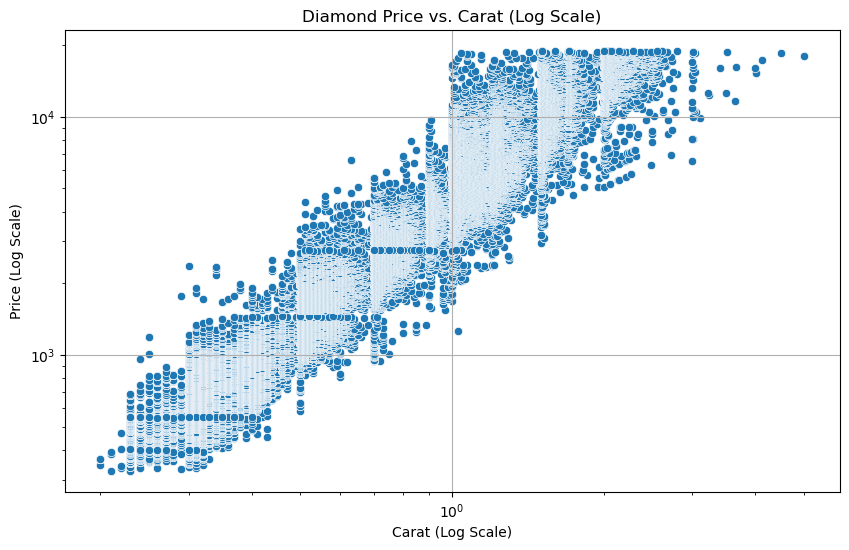

In [110]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds, x="carat", y="price")

# Set log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Set labels and title
plt.xlabel("Carat (Log Scale)")
plt.ylabel("Price (Log Scale)")
plt.title("Diamond Price vs. Carat (Log Scale)")
plt.grid(True)
plt.show()

### Multiple geoms in the same plot

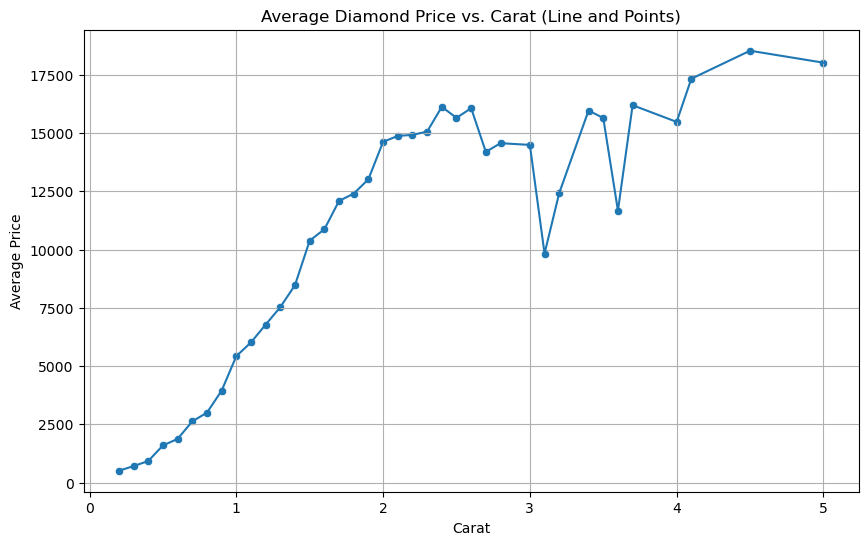

In [113]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_price_by_carat, x='carat', y='avg_price')
sns.scatterplot(data=avg_price_by_carat, x='carat', y='avg_price')

# Set labels and title
plt.xlabel('Carat')
plt.ylabel('Average Price')
plt.title('Average Diamond Price vs. Carat (Line and Points)')
plt.grid(True) # add grid for better readability
plt.show()

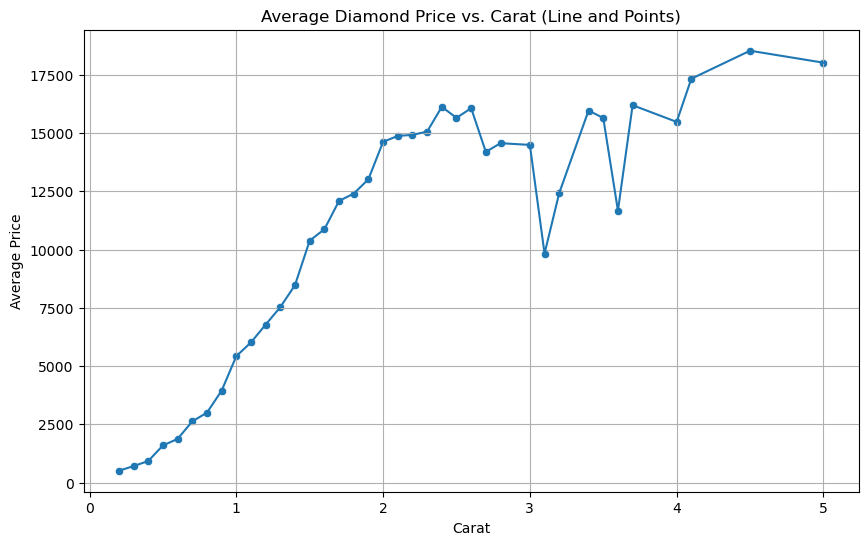

In [115]:
plt.figure(figsize=(10, 6))
ax = sns.lineplot(data=avg_price_by_carat, x='carat', y='avg_price')
sns.scatterplot(data=avg_price_by_carat, x='carat', y='avg_price', ax=ax)

# Set labels and title
plt.xlabel('Carat')
plt.ylabel('Average Price')
plt.title('Average Diamond Price vs. Carat (Line and Points)')
plt.grid(True)
plt.show()

### Multiple aesthetics in the same geom

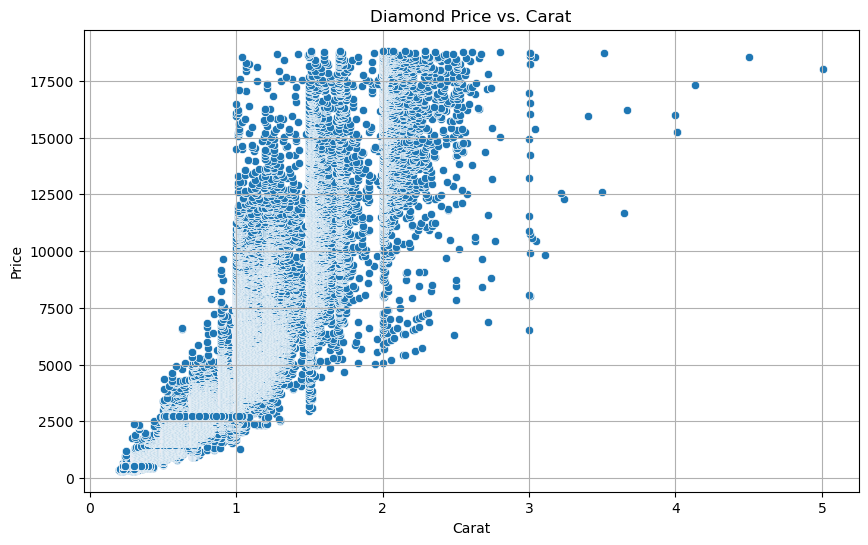

In [118]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds, x='carat', y='price')

# Set labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Price vs. Carat')
plt.grid(True)
plt.show()

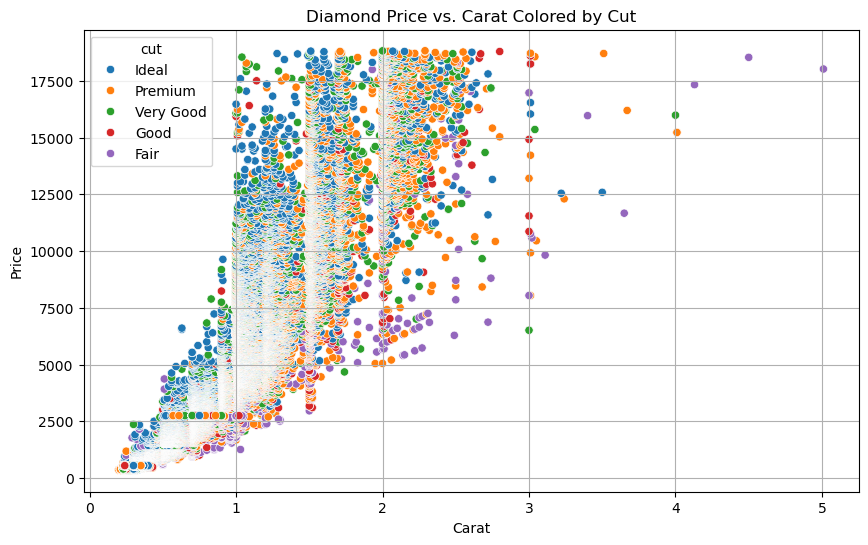

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=diamonds, x='carat', y='price', hue='cut')

# Set labels and title
plt.xlabel('Carat')
plt.ylabel('Price')
plt.title('Diamond Price vs. Carat Colored by Cut')
plt.grid(True)
plt.show()

### Faceting

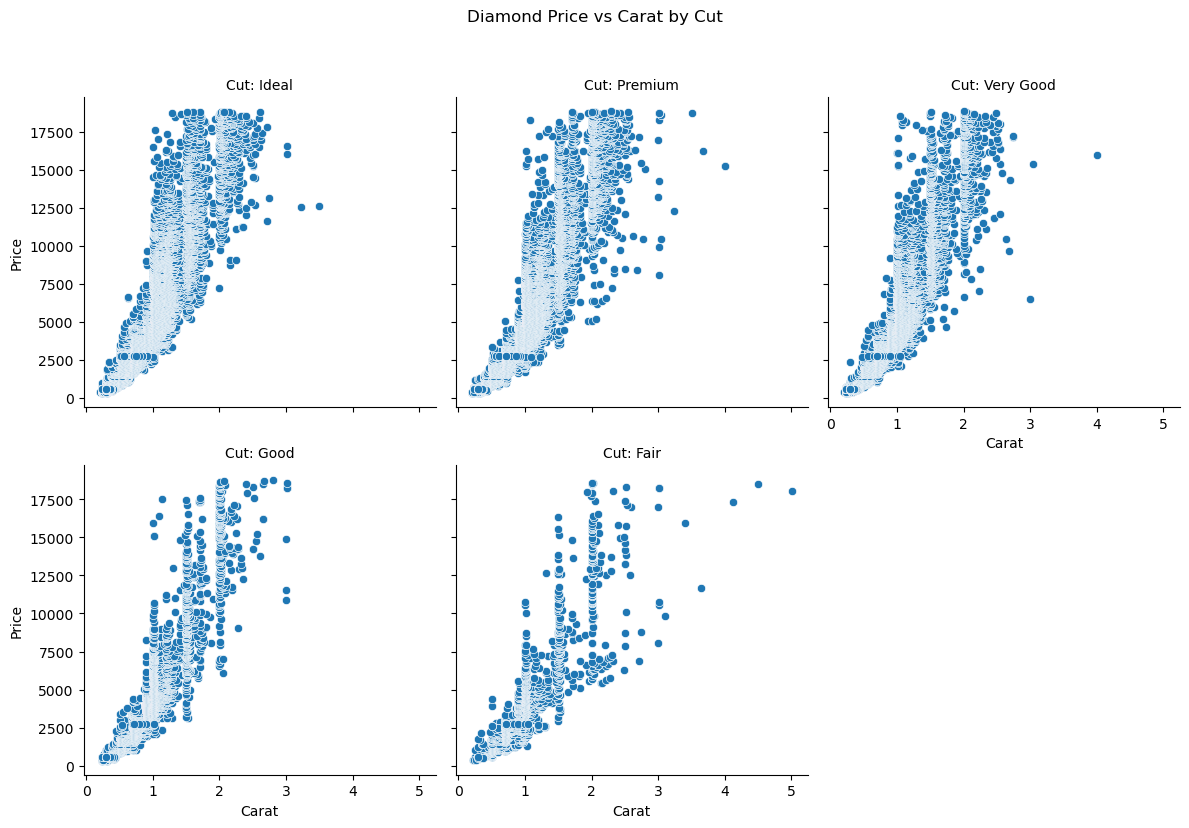

In [123]:
g = sns.FacetGrid(diamonds, col='cut', col_wrap=3, height=4) # can change col_wrap for formatting
g.map(sns.scatterplot, 'carat', 'price')

# Set labels and title for whole plot
g.set_titles("Cut: {col_name}")
g.set_axis_labels('Carat', 'Price')
plt.suptitle("Diamond Price vs Carat by Cut", y=1.03)
plt.tight_layout() # Ensure everything fits well
plt.show()

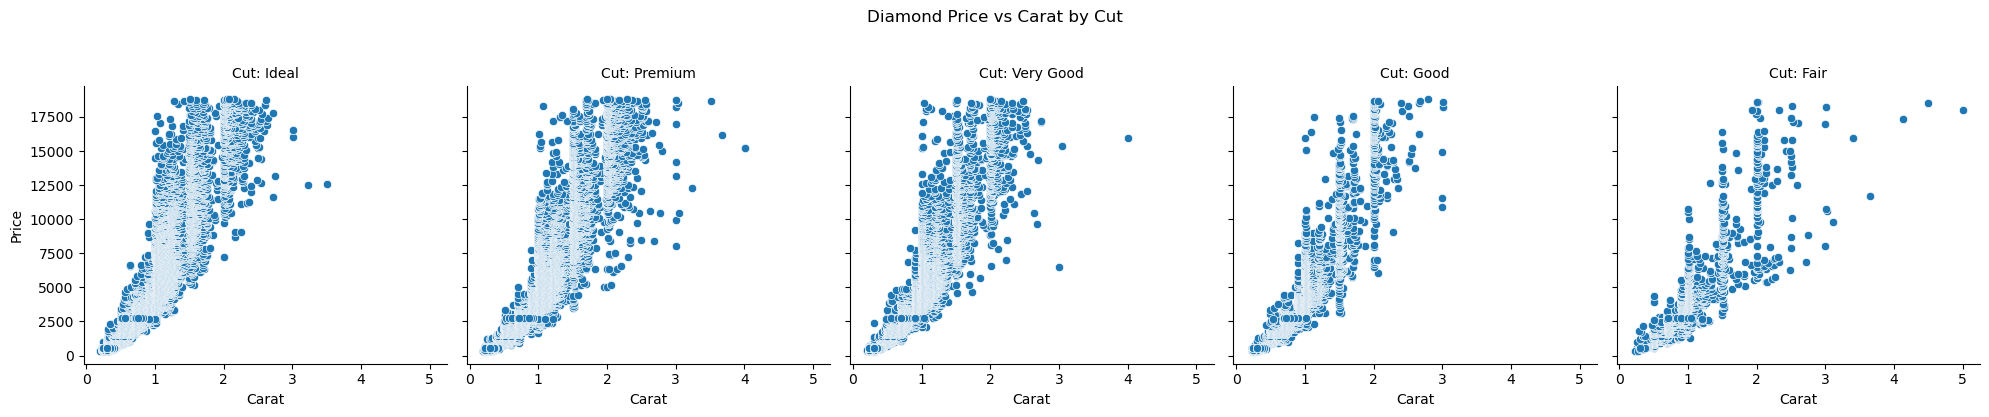

In [125]:
g = sns.FacetGrid(diamonds, col='cut', height=4) # can change height for formatting
g.map(sns.scatterplot, 'carat', 'price')

# Set labels and title for whole plot
g.set_titles("Cut: {col_name}")
g.set_axis_labels('Carat', 'Price')
plt.suptitle("Diamond Price vs Carat by Cut", y=1.03)
plt.tight_layout() # Ensure everything fits well
plt.show()

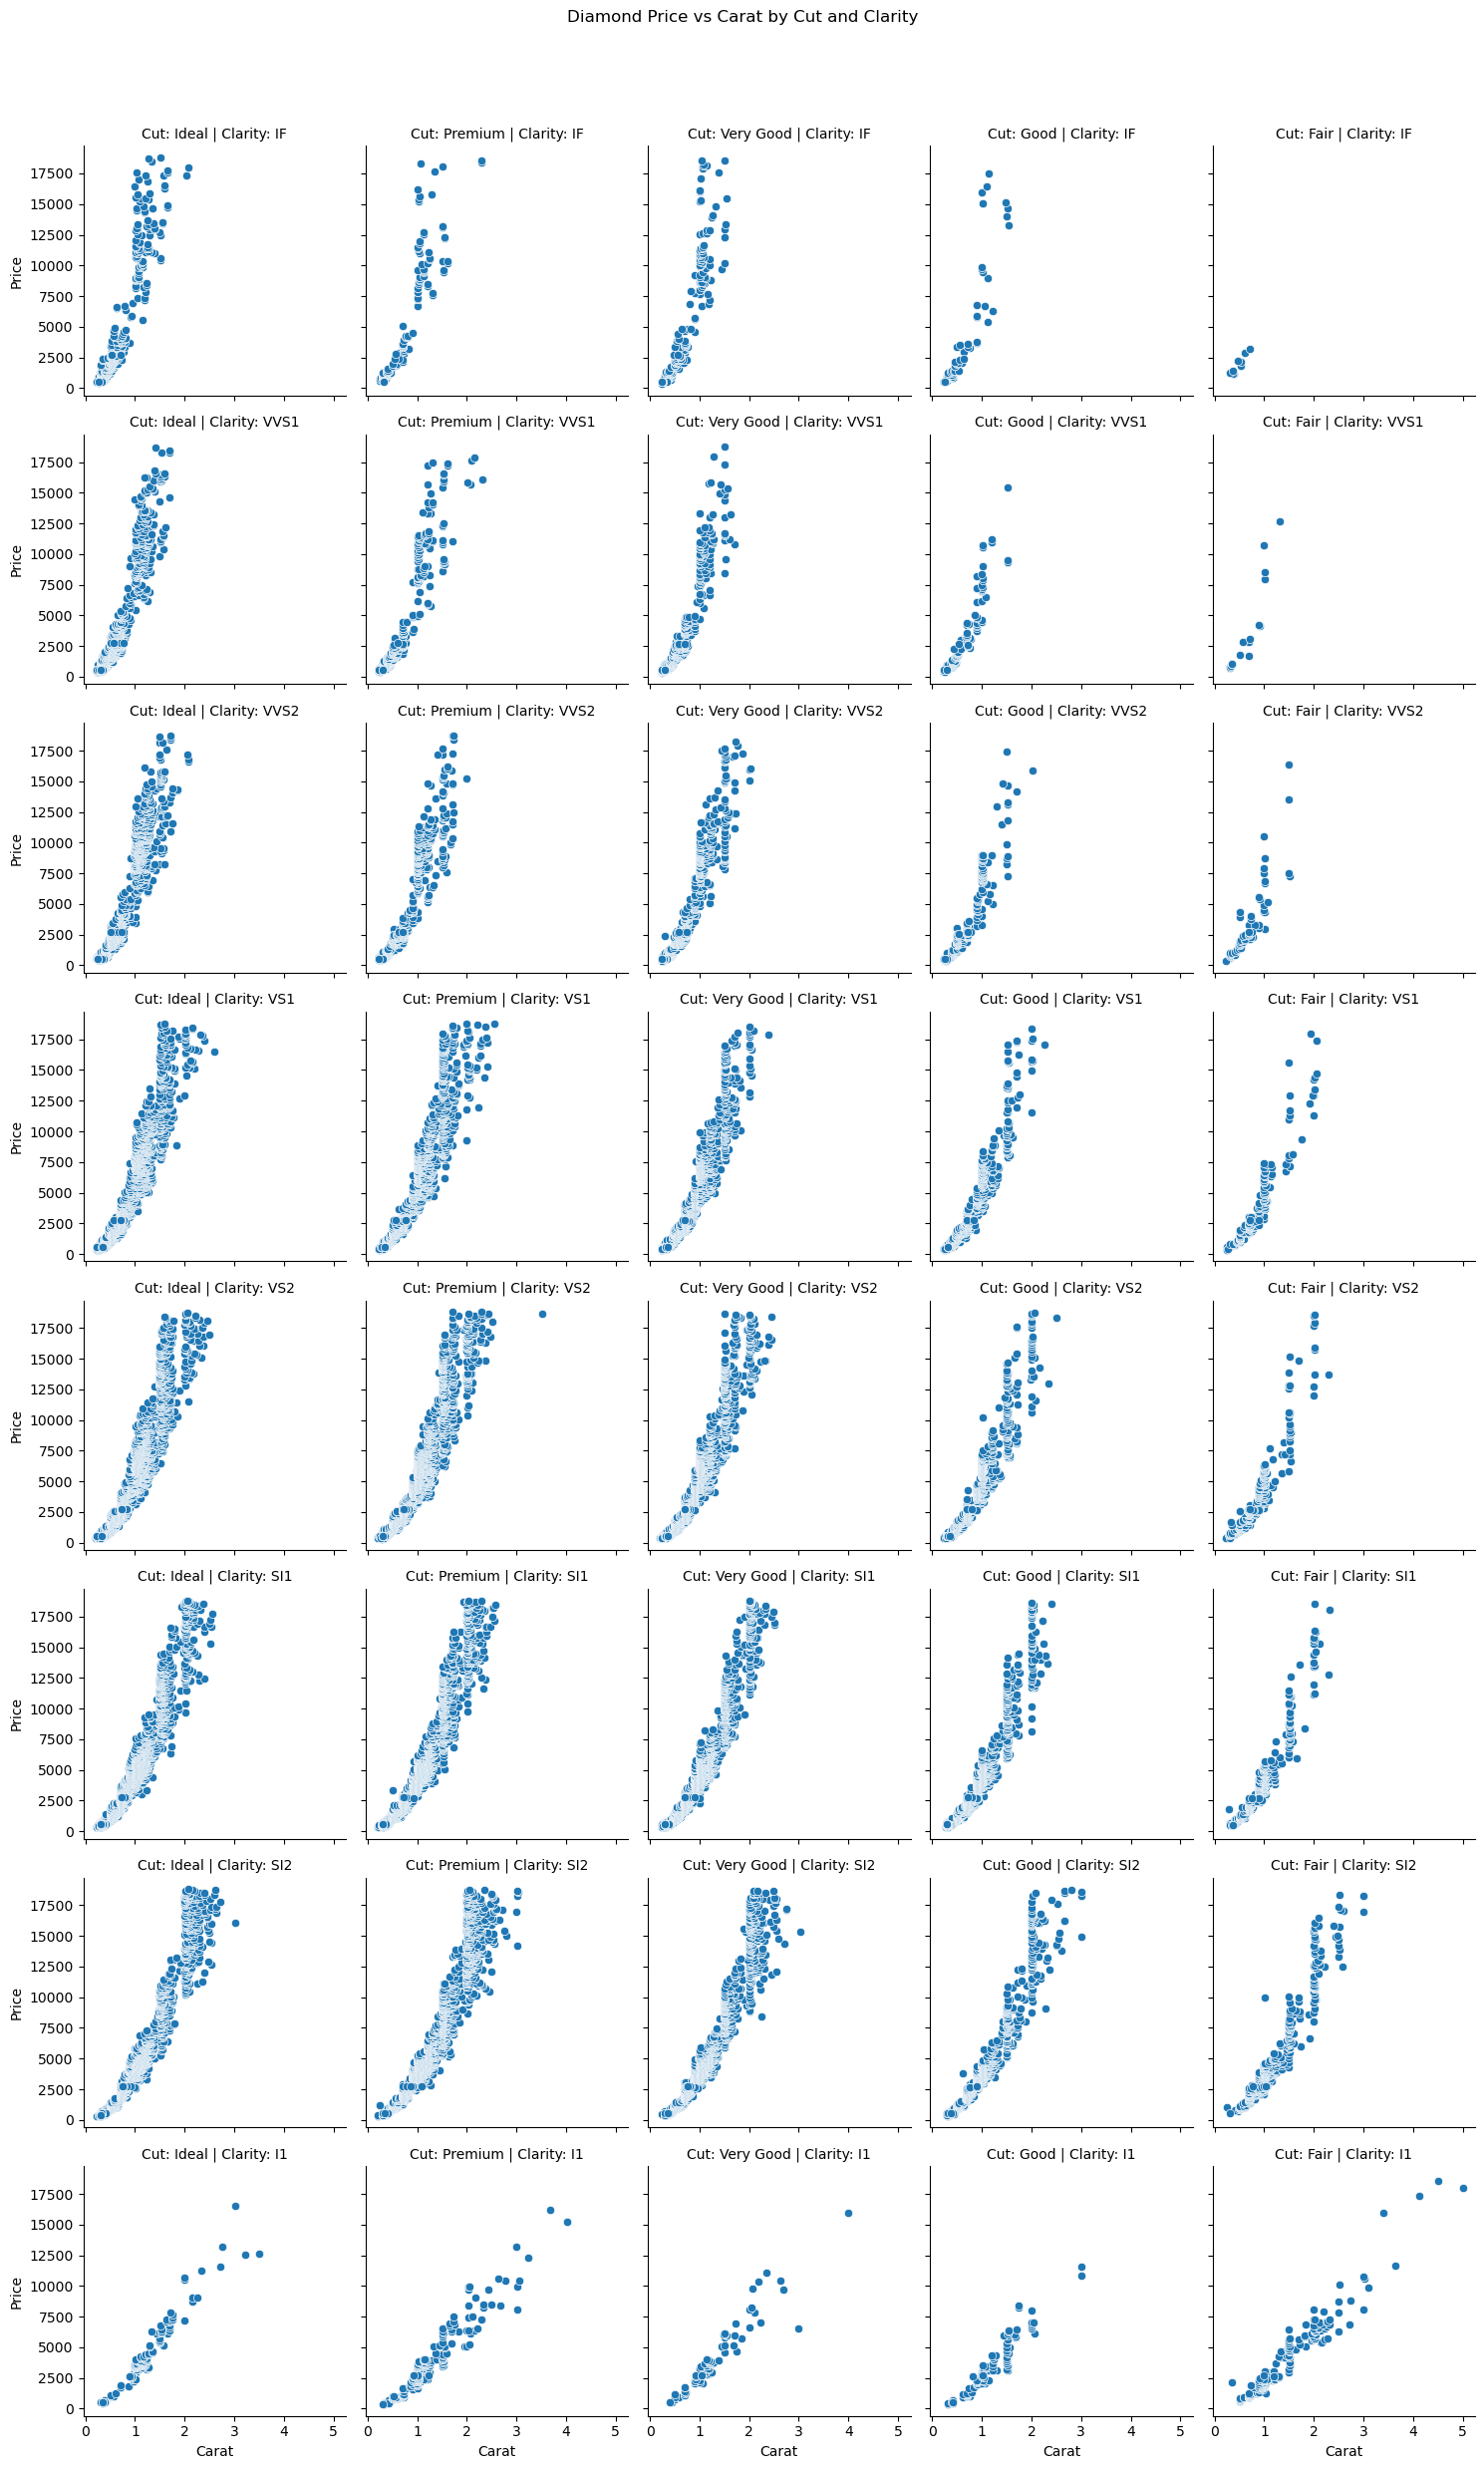

In [127]:
g = sns.FacetGrid(diamonds, row='clarity', col='cut', height=3) # can change height for formatting
g.map(sns.scatterplot, 'carat', 'price')

# Set labels and title for whole plot
g.set_titles("Cut: {col_name} | Clarity: {row_name}")
g.set_axis_labels('Carat', 'Price')
plt.suptitle("Diamond Price vs Carat by Cut and Clarity", y=1.03)
plt.tight_layout()
plt.show()